# Solutions to Problem Set 2

## Shashank Sule

### Problem 1 

In [126]:
function rectangular_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.0
    for n=0:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

function trapezoid_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.5*Δ*f(a) + 0.5*Δ*f(b)
    for n=1:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

function simpson_rule(f, a, b, N)
    Δ = (b - a)/N
    h = Δ/2
    
    I = h*f(a)/3 + h*f(b)/3
    for n=1:N-1
        I += h*( 2*f(a + 2*n*h) + 4*f(a+ (2*n-1)*h))/3
    end
    I += 4*h*f(a+ (2*N-1)*h)/3
    
    return I
end

simpson_rule (generic function with 1 method)

In [130]:
function integral_calc(f,quadrature_rule,a,b,N,ϵ)
    Q1 = quadrature_rule(f,a,b,N)
    Q2 = quadrature_rule(f,a,b,2N)
    e = abs(Q1 - Q2)
    if e < ϵ
        return Q2
    else
        A = integral_calc(f,quadrature_rule, a,(a+b)/2,N,ϵ);
        B = integral_calc(f,quadrature_rule, (a+b)/2,b,N,ϵ);
        return A + B
    end
end

integral_calc (generic function with 1 method)

In [131]:
f(x) = x^(10)*exp(4*x^3-3*x^4)

f (generic function with 1 method)

In [132]:
integralsR = [integral_calc(f,rectangular_rule,0,3,1,(10.0)^(-i)) for i in 1:8];
integralsT = [integral_calc(f,trapezoid_rule,0,3,1,(10.0)^(-i)) for i in 1:8];
integralsS = [integral_calc(f,simpson_rule,0,3,1,(10.0)^(-i)) for i in 1:8];
Val = simpson_rule(f,0,3,10^7);


In [133]:
integralseR = abs.(integralsR .- Val)./Val;
integralseT = abs.(integralsT .- Val)./Val;
integralseS = abs.(integralsS .- Val)./Val;

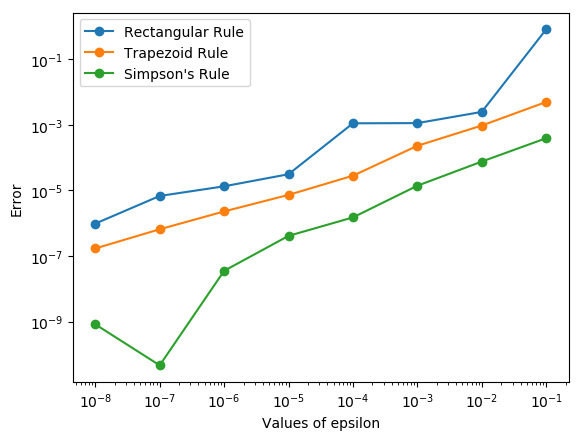

In [135]:
using PyPlot 
loglog([(10.0)^(-i) for i in 1:8], integralseR, "o-", label="Rectangular Rule");
loglog([(10.0)^(-i) for i in 1:8], integralseT, "o-", label="Trapezoid Rule");
loglog([(10.0)^(-i) for i in 1:8], integralseS, "o-", label="Simpson's Rule");
xlabel("Values of epsilon");
ylabel("Error");
legend();

### Problem 2

Set $u(x) = \int_{a}^{x} f(t) \,dt$. Then from the Fundamental theorem of Calculus, $\dfrac{du}{dx} = f(x) $. Here $u(a) = 0$ and $u(b) = \int_{a}^{b}f(t) \, dt$, which is the integral we want to compute. Thus, solving $\dfrac{du}{dt}$ where $u(a) = 0$ on the interval $[a,b]$ is equivalent to computing the integral.  

$\textbf{Euler's Method:}$ Note that Euler's method is defined by the following rule: Set $\Delta = \frac{b-a}{N}$ and set $N$ equally spaced points of the form  

$$ t_{n+1} = t_n + \Delta$$

where $t_0 = a$ and $t_N = b$. Then compute $u^{E}$ as 

$$ u^{E}(t_{n+1}) = u^{E}(x_n) + \Delta f(t_n, u^{E}_n) $$

In the current case, $f(t_n, u^{E}_n) = f(t_n)$, so 

$$ u(x_1) = u(t_0) + \Delta f(t_0) $$
$$ u(x_2) = u(t_1) + \Delta f(t_1) = u(x_0) + \Delta f(t_0) + \Delta f(t_1) $$ 

and so on. More generally,

$$ u(t_k) = u(t_0) + \sum_{n=0}^{k-1}\Delta f(t_n) $$

We want the value $u(b)$. From the above approximation rule we have

$$ u(b) = u = u(t_0) + \sum_{n=0}^{N-1}\Delta f(t_n) = \sum_{n=0}^{N}\Delta f(t_n) = \sum_{n=0}^{N-1}\Delta f(t_n) = \sum_{n=0}^{N}\Delta f(t_n) $$

Note that this is precisely the formula for the rectangular method. Thus, the Euler method is equivalent to the rectangular method for quadrature computation.

$\textbf{Improved Euler's Method:}$ The rule for the improved Euler's method is 

$$ t_{n+1} = t_n + \Delta $$

$$ u^{IE}(x_{n+1}) = u(x_n) + \frac{\Delta}{2}(f(t_n, u_{n+1}) + f(t_{n+1}, u^{E}(t_{n+1})) = u(x_n) + \frac{\Delta}{2}(f(t_n) + f(t_{n+1}) $$

Adding up each term to compute $u(b)$, we get that 

$$ u(b) = u(x_N) = \sum_{n=0}^{N-1}\frac{\Delta}{2}(f(t_n) + f(t_{n+1})$$

Once again, this is exactly the formula for the trapezoid rule with $N$ subintervals. Thus, integrating with the improved Euler's method is equivalent to the trapezoid method. 

### Problem 3

Let $u(a)$ be the true solution at $a$. Then expanding the taylor series of $u$ around $a$ we get that 

$$ u(a+h) = u(a) + hf(a,u(a)) + \frac{h^2}{2}u''(a) + O(h^3) $$

Now let $u^M(t)$ be the numerical solution at $a$. Then 

$$ u^M(a+h) = u(a) + hf\Big(a + \frac{h}{2}, u(a) + \frac{h}{2}f(a,u(a))\Big)$$

Now using the first order multivariable Taylor series on $f$ centered at $(a,u(a))$ we get that 

$$ u^M(a+h) = u(a) + h\Big(f(a,u(a)) + \frac{h}{2}f_t(a,u(a)) + \frac{h}{2}f(a,u(a))f_u(a,u(a)) + O(h^2) \Big) $$

$$ = u(a) + hf(a,u(a)) + \frac{h^2}{2}f_t(a,u(a)) + \frac{h^2}{2}f(a,u(a))f_u(a,u(a)) + O(h^3) $$

$$ = u(a) + hf(a,u(a)) + \frac{h^2}{2}\Big(f_t(a,u(a)) + f_u(a,u(a))u'(a) \Big) + O(h^3) $$

Notice that from the multivariable chain rule we have 

$$ u''(t) = \dfrac{d}{dt}f(t,u) = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial u}\frac{du}{dt} = f_t + f_uf$$

This is exactly the form of the third term in the expansion of $u^{M}(a+h)$. Thus,

$$ u^M(a+h) = u(a) + hf(a,u(a)) + \frac{h^2}{2}u''(a) + O(h^3) $$

Finally, 

$$ u^M(a+h) - u(a+h) = \epsilon = O(h^3) $$

Thus, as the step size decreases the error improves by cubed. In other words, if you decrease the step size by one order of magnitude, the error improves by three orders of magnitude. 

If we integrate over a fixed interval $[a,b]$ where we make $N$ function evaluations, then the step size is given by $h=\frac{b-a}{N}$ which means that $N = \frac{b-a}{h}$. So as we make $N$ computations, we add up $O(h^3)$ errors $N \approx O(h^{-1})$ times, so the overall error is $O(h^3)O(h^{-1}) \approx O(h^2)$

### Problem 4

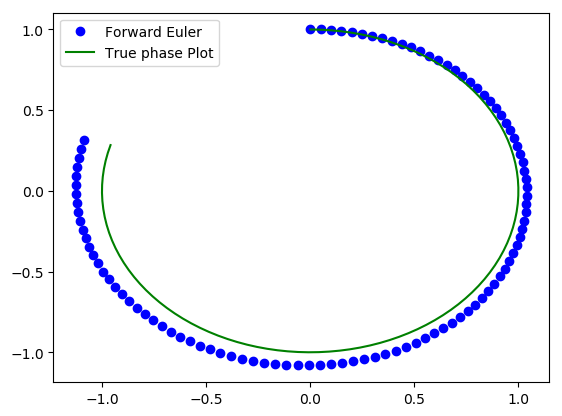

In [136]:
N = 100;
h=0.05;
t0 = 0.0;
Ts = collect(t0 .+ h*(0:N))
Xs = zeros(size(Ts));
Vs = zeros(size(Ts));
Xs[1] = 0.0;
Vs[1] = 1.0;
for i in 1:N
    Xs[i+1] = Xs[i] + h*(Vs[i]);
    Vs[i+1] = Vs[i] + h*(-Xs[i]);
end

plot(Xs, Vs, "bo", label="Forward Euler");
plot([sin(x) for x in Ts],[cos(x) for x in Ts], "g-", label="True phase Plot");
legend();

b) The true energy is 

$$ E(t) = \frac{1}{2}\sin^2{t} + \frac{1}{2}\cos^2{t} = \frac{1}{2}$$

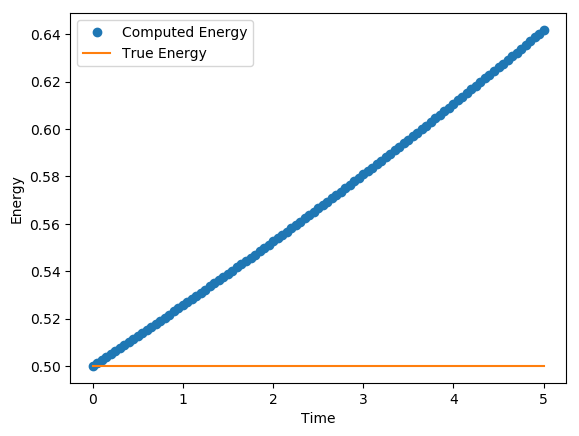

In [137]:
energy = (0.5).*(Vs.^(2)) .+ (0.5).*(Xs.^(2));
plot(Ts, energy, "o",label="Computed Energy");
plot(Ts, fill(0.5, size(Ts)[1]), label="True Energy");
ylabel("Energy");
xlabel("Time");
legend();

In [138]:
function leapfrog_integrator(f,t0,x0,v0,h,N)
    ts = collect(t0 .+ h.*(0:N));
    xs = zeros(2*size(ts)[1]-1);
    vs = zeros(2*size(ts)[1]-1);
    xs[1] = x0;
    vs[1] = v0; 
    for i in 1:2:size(vs)[1]-2
        vs[i+1] = vs[i] + (0.5)*h*f(xs[i]);
        xs[i+2] = xs[i] + h*vs[i+1];
        vs[i+2] = vs[i+1] + (0.5)*h*f(xs[i+2]);
    end
    
    vs = deleteat!(vs, 2:2:size(vs)[1]-1);
    xs = deleteat!(xs, 2:2:size(xs)[1]-1);
    E = (0.5).*(vs.^(2)) + (0.5).*(xs.^(2));
    return ts, vs, xs, E 
end 



leapfrog_integrator (generic function with 1 method)

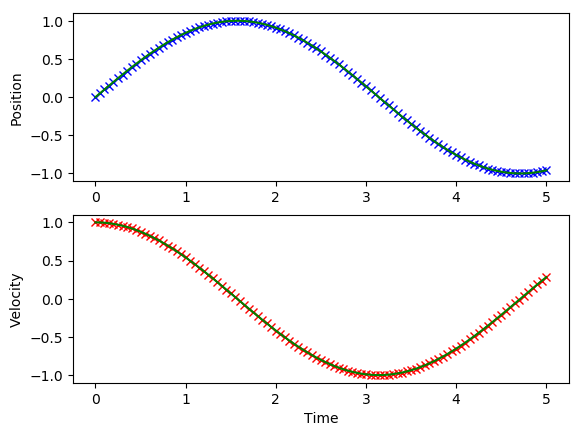

In [139]:
f(x) = -x
g1(x) = sin(x)
g2(x) = cos(x)
Time = leapfrog_integrator(f, 0.0, 0.0, 1.0, 0.05, 100)[1];

Velocity = leapfrog_integrator(f, 0.0, 0.0, 1.0, 0.05, 100)[2];

Position = leapfrog_integrator(f, 0.0, 0.0, 1.0, 0.05, 100)[3];

Energy = leapfrog_integrator(f, 0.0, 0.0, 1.0, 0.05, 100)[4];

E = collect(0.5 .+ zeros(size(Time)[1]));

using PyPlot
figure(2)

subplot(211)
plot(Time,Position,"bx");
plot(Time,[g1(i) for i in Time],"g");
#xlabel("Time");
ylabel("Position");

subplot(212)
plot(Time, Velocity, "rx");
plot(Time,[g2(i) for i in Time],"g");
xlabel("Time");
ylabel("Velocity");

#subplot(213)
#plot(Time, Energy, "rx");
#plot(Time, E, "b-");

#show()

Thus, qualitatively the solution looks OK. Computing energy:

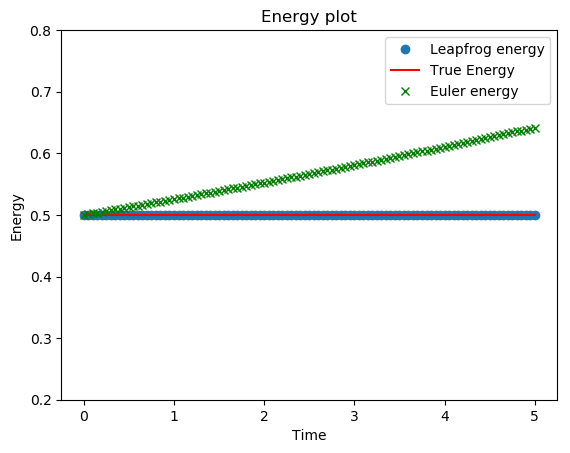

In [141]:
using PyPlot

plot(Time, Energy, "o", label="Leapfrog energy");
plot(Time, E, "r-", label="True Energy");
plot(Time, energy, "gx", label="Euler energy");
title("Energy plot");
ylabel("Energy")
xlabel("Time");
ylim(0.2,0.8);
legend();
#axis("tight");

Indeed, Leapfrog does almost matches the true energy. 

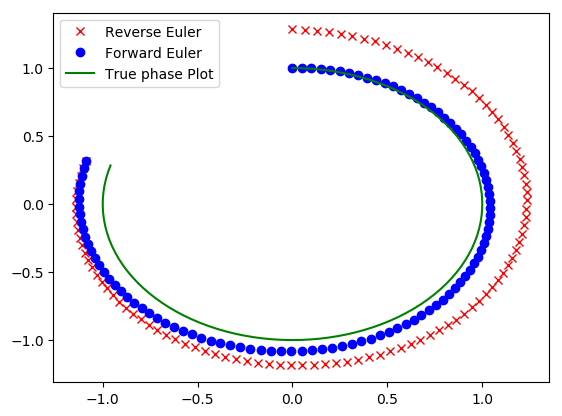

In [142]:
revt0 = Ts[N+1]
h = -0.05
revts = collect(revt0 .+ h*(0:N))
revxs = zeros(size(Ts));
revvs = zeros(size(Ts));
revxs[1] = Xs[N+1];
revvs[1] = Vs[N+1];
for i in 1:N
    revxs[i+1] = revxs[i] + h*(revvs[i]);
    revvs[i+1] = revvs[i] + h*(-revxs[i]);
end

plot(revxs,revvs, "rx", label="Reverse Euler");
plot(Xs, Vs, "bo", label="Forward Euler");
plot([sin(x) for x in revts],[cos(x) for x in revts], "g-", label="True phase Plot");
legend();

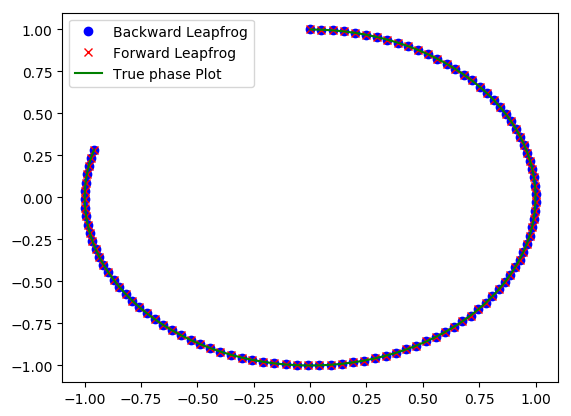

In [143]:
T0 = Time[size(Time)[1]]; V0 = Velocity[size(Velocity)[1]]; X0 = Position[size(Position)[1]];
plot(leapfrog_integrator(f, T0, X0, V0, -0.05, 100)[3],leapfrog_integrator(f, T0, X0, V0, -0.05, 100)[2], "bo", label="Backward Leapfrog")
plot(Position, Velocity, "rx", label="Forward Leapfrog");
plot([sin(x) for x in Time],[cos(x) for x in Time], "g-", label="True phase Plot");
legend();

Yes, Leapfrog has fixed time reversal asymmetry!

e) $\textbf{Leapfrog Method}:$ Let the forward leapfrog method be defined as the one given:

$$ v_{t+ h/2}^{f} = v_{t}^{f} + \frac{h}{2}F(x^{f}_{t})$$
$$ x^{f}_{t + h} = x_{t}^{f} + hv_{t + h/2}^{f} $$
$$ v_{t + h}^{f} = v_{t + h/2}^{f} + \frac{h}{2}F(x_{t+h}^{f})$$

Let the backward leapfrog method be analogously defined: 

$$ v_{t - h/2}^{b} = v_{t}^{b} - \frac{h}{2}F(x^{b}_{t})$$
$$ x^{b}_{t - h} = x_{t}^{b} - hv_{t - h/2}^{b} $$
$$ v_{t - h}^{b} = v_{t - h/2}^{b} - \frac{h}{2}F(x_{t-h}^{b})$$

Assuming the methods run between $t$ and $t+h$ with a time step $h$, we intend to show that if we set the initial data of the backward method at $t+h$ as the final data of the forward method at $t+h$, then one iteration of the backward method to $t$ produces the initial data of the forward method at $t$. 

Thus let's set 

$$ v_{t+h}^{b} = v_{t+h}^{f} \text{ and } x_{t+h}^{b} = x_{t+h}^{f} $$

Then 

$$ v_{t+h - h/2}^{b} = v_{t+h}^{b} - \frac{h}{2}F(x^{b}_{t+h}) = v_{t+h}^{f} - \frac{h}{2}F(x^{f}_{t+h})$$

Now notice that 

$$ v_{t + h}^{f} - v_{t + h/2}^{f} = \frac{h}{2}F(x_{t+h}^{f}) $$ 

So the previous equation becomes 

$$ v_{t+h - h/2}^{b} = v_{t + h/2}^{b} = v_{t+h}^{f} - \frac{h}{2}F(x^{f}_{t+h}) = v_{t+h}^{f} - v_{t + h}^{f} + v_{t + h/2}^{f} = v_{t + h/2}^{f} $$

To calculate the position time step we do 

$$ x^{b}_{t} = x^{b}_{t + h - h} = x_{t + h}^{b} - hv_{t + h/2}^{b} = x_{t + h}^{f} - hv_{t + h/2}^{f} $$

Once again from the forward method, we get that 

$$ x^{f}_{t + h} - x_{t}^{f} = hv_{t + h/2}^{f}  $$ 

Plugging this value into the second-to-last equation, we have that 

$$ x^{b}_{t} =  x_{t + h}^{f} - hv_{t + h/2}^{f} = x_{t + h}^{f} - x^{f}_{t + h} + x_{t}^{f} = x_{t}^{f} $$

Finally, computing velocity,

$$ v_{t}^{b} = v_{t + h/2}^{b} - \frac{h}{2}F(x_{t}^{b}) = v_{t + h/2}^{f} - \frac{h}{2}F(x_{t}^{f}) = v_{t}^{f} $$

Thus, one iteration of the backward method gets us back to the initial condition of the forward method. Hence leapfrog preserves time-reversal symmetry. 

$\textbf{Euler's Method:}$ The forward Euler's method is given by 

$$ x_{t+h}^{f} = x_{t}^{f} + hv_{t}^{f} $$
$$ v_{t+h}^{f} = v_{t}^{f} + hF(x_{t}^{f}) $$

and the backward by 

$$ x_{t-h}^{b} = x_{t}^{b} - hv_{t}^{b} $$
$$ v_{t-h}^{b} = v_{t}^{f} - hF(x_{t}^{b}) $$

Running the same procedure as above by setting $v_{t+h}^{f} = v_{t+h}^{b}$ and $x_{t+h}^{f} = x_{t+h}^{b}$ we have that 

$$ v_{t}^{f} = v_{t+h}^{f} - hF(x_{t}^{f}) $$
$$ v_{t}^{b} = v_{t+h}^{b} + hF(x_{t}^{b}) = v_{t+h}^{f} + hF(x_{t}^{f}) $$

The two are not equal unless $F(x_{t+h}^{f})$ and $F(x_{t}^{f})$ are equal. Thus, the Euler method does not exhibit time-reversal symmetry. 

### Problem 5

a) I use Newton's inverse square law which states that the magnitude of the gravitational force on a given body by another body is proportional to their masses and inversely proportional to the square of the distance between them and acts in the direction towards the other body:

$$ \textbf{F}_{21} = m\ddot{\textbf{r}}_{21} = \frac{Gm_1m_2}{|\textbf{r}_2 - \textbf{r}_1|^2}\frac{\textbf{r}_2 - \textbf{r}_1}{|\textbf{r}_2 - \textbf{r}_1|}$$

Here $\textbf{F}_{21}$ is the force acting on 1 from 2 where their positions are given by $\textbf{r}_1$ and $\textbf{r}_2$. 

Let $\textbf{F}_i$ be the total force acting on body $i$. Then for $i=1,2,3$, 

$$ \textbf{F}_{1} = \frac{Gm^2}{|\textbf{r}_2 - \textbf{r}_1|^2}\frac{\textbf{r}_2 - \textbf{r}_1}{|\textbf{r}_2 - \textbf{r}_1|} + \frac{Gm^2}{|\textbf{r}_3 - \textbf{r}_1|^2}\frac{\textbf{r}_3 - \textbf{r}_1}{|\textbf{r}_3 - \textbf{r}_1|} $$

$$ \textbf{F}_{2} = \frac{Gm^2}{|\textbf{r}_1 - \textbf{r}_2|^2}\frac{\textbf{r}_1 - \textbf{r}_2}{|\textbf{r}_1 - \textbf{r}_2|} + \frac{Gm^2}{|\textbf{r}_3 - \textbf{r}_2|^2}\frac{\textbf{r}_3 - \textbf{r}_2}{|\textbf{r}_3 - \textbf{r}_2|} $$

$$ \textbf{F}_{3} = \frac{Gm^2}{|\textbf{r}_1 - \textbf{r}_3|^2}\frac{\textbf{r}_1 - \textbf{r}_3}{|\textbf{r}_1 - \textbf{r}_3|} + \frac{Gm^2}{|\textbf{r}_2 - \textbf{r}_3|^2}\frac{\textbf{r}_2 - \textbf{r}_3}{|\textbf{r}_2 - \textbf{r}_3|} $$

Normalizing $Gm$ to 1 and observing that mass of body $i$ cancels on both sides of the equation, we get the following component-wise equations: 

$$ \begin{bmatrix}\ddot{x}_1 \\ \ddot{y}_1 \end{bmatrix}= \begin{bmatrix} \frac{1}{((x_2 - x_1)^2 + (y_2 - y_1)^2)^{3/2}}(x_2 - x_1) + \frac{1}{((x_3 - x_1)^2 + (y_3 - y_1)^2)^{3/2}}(x_3 - x_1) \\ \frac{1}{((x_2 - x_1)^2 + (y_2 - y_1)^2)^{3/2}}(y_2 - y_1) + \frac{1}{((x_3 - x_1)^2 + (y_3 - y_1)^2)^{3/2}}(y_3 - y_1)\end{bmatrix}$$

$$ \begin{bmatrix}\ddot{x}_2 \\ \ddot{y}_2 \end{bmatrix}= \begin{bmatrix} \frac{1}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}(x_1 - x_2) + \frac{1}{((x_3 - x_2)^2 + (y_3 - y_2)^2)^{3/2}}(x_3 - x_2) \\ \frac{1}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}(y_1 - y_2) + \frac{1}{((x_3 - x_2)^2 + (y_3 - y_2)^2)^{3/2}}(y_3 - y_2)\end{bmatrix}$$

$$ \begin{bmatrix}\ddot{x}_2 \\ \ddot{y}_2 \end{bmatrix}= \begin{bmatrix} \frac{1}{((x_1 - x_3)^2 + (y_1 - y_3)^2)^{3/2}}(x_1 - x_3) + \frac{1}{((x_2 - x_3)^2 + (y_2 - y_3)^2)^{3/2}}(x_2 - x_3) \\ \frac{1}{((x_1 - x_3)^2 + (y_1 - y_3)^2)^{3/2}}(y_1 - y_3) + \frac{1}{((x_2 - x_3)^2 + (y_2 - y_3)^2)^{3/2}}(y_2 - y_3)\end{bmatrix}$$

In [90]:
t0 = 0.0;
h = 0.2;
N = 100;
ts = collect(t0 .+ h.*(0:N));
x10 = -0.7;
y10 = 0.35;
x20 = 1.1;
y20 = -0.07;
x30 = -0.4;
y30 = -0.3;
vx10 = 0.99;
vy10 = 0.078;
vx20 = 0.1;
vy20 = 0.47;
vx30 = -1.1;
vy30 = -0.53;

x1 = zeros(2*size(ts)[1]-1);
vx1 = zeros(2*size(ts)[1]-1);
x1[1] = x10;
vx1[1] = vx10; 

y1 = zeros(2*size(ts)[1]-1);
vy1 = zeros(2*size(ts)[1]-1);
y1[1] = y10;
vy1[1] = vy10; 

x2 = zeros(2*size(ts)[1]-1);
vx2 = zeros(2*size(ts)[1]-1);
x2[1] = x20;
vx2[1] = vx20; 

y2 = zeros(2*size(ts)[1]-1);
vy2 = zeros(2*size(ts)[1]-1);
y2[1] = y20;
vy2[1] = vy20; 

x3 = zeros(2*size(ts)[1]-1);
vx3 = zeros(2*size(ts)[1]-1);
x3[1] = x30;
vx3[1] = vx30; 

y3 = zeros(2*size(ts)[1]-1);
vy3 = zeros(2*size(ts)[1]-1);
y3[1] = y30;
vy3[1] = vy30;

for i in 1:2:size(x1)[1]-2

r12 = (x2[i]-x1[i])^2 + (y2[i]-y1[i])^2
r23 = (x2[i]-x3[i])^2 + (y2[i]-y3[i])^2
r13 = (x3[i]-x1[i])^2 + (y3[i]-y1[i])^2
    
#These are all the 1st velocity steps  
#Velocities for the 1st particle 
vx1[i+1] = vx1[i] + (0.5)*h*((r12^(-1.5))*(x2[i]-x1[i]) + (r13^(-1.5))*(x3[i]-x1[i]))

vy1[i+1] = vy1[i] + (0.5)*h*((r12^(-1.5))*(y2[i]-y1[i]) + (r13^(-1.5))*(y3[i]-y1[i]))

#Velocities for the 2nd particle 

vx2[i+1] = vx2[i] + (0.5)*h*((r12^(-1.5))*(x1[i]-x2[i]) + (r23^(-1.5))*(x3[i]-x2[i]))

vy2[i+1] = vy2[i] + (0.5)*h*((r12^(-1.5))*(y1[i]-y2[i]) + (r23^(-1.5))*(y3[i]-y2[i]))

#Velocities for the 3rd particle 
    
vx3[i+1] = vx3[i] + (0.5)*h*((r13^(-1.5))*(x1[i]-x3[i]) + (r23^(-1.5))*(x2[i]-x3[i]))

vy3[i+1] = vy3[i] + (0.5)*h*((r13^(-1.5))*(y1[i]-y3[i]) + (r23^(-1.5))*(y2[i]-y3[i]))
    
#These are all the position steps
#Positions for the 1st particle        
x1[i+2] = x1[i] + h*vx1[i+1]
y1[i+2] = y1[i] + h*vy1[i+1]

#Positions for the 2nd particle 

x2[i+2] = x2[i] + h*vx2[i+1]    
y2[i+2] = y2[i] + h*vy2[i+1]
    
#Positions for the 3rd particle
    
x3[i+2] = x3[i] + h*vx3[i+1]    
y3[i+2] = y3[i] + h*vy3[i+1]
    
#These are all the 2nd velocity steps 
r12 = (x2[i+2]-x1[i+2])^2 + (y2[i+2]-y1[i+2])^2
r23 = (x2[i+2]-x3[i+2])^2 + (y2[i+2]-y3[i+2])^2
r13 = (x3[i+2]-x1[i+2])^2 + (y3[i+2]-y1[i+2])^2
#Velocity for particle 1
       
vx1[i+2] = vx1[i+1]+ (0.5)*h*((r12^(-1.5))*(x2[i+2]-x1[i+2]) + (r23^(-1.5))*(x3[i+2]-x1[i+2]))
    
vy1[i+2] = vy1[i+1]+ (0.5)*h*((r12^(-1.5))*(y2[i+2]-y1[i+2]) + (r23^(-1.5))*(y3[i+2]-y1[i+2]))
    
#Velocity for particle 2 

vx2[i+2] = vx2[i+1]+ (0.5)*h*((r12^(-1.5))*(x1[i+2]-x2[i+2]) + (r23^(-1.5))*(x3[i+2]-x2[i+2]))

vy2[i+2] = vy2[i+1]+ (0.5)*h*((r12^(-1.5))*(y1[i+2]-y2[i+2]) + (r23^(-1.5))*(y3[i+2]-y2[i+2]))

#Velocity for particle 3

vx3[i+2] = vx3[i+1]+ (0.5)*h*((r13^(-1.5))*(x1[i+2]-x3[i+2]) + (r23^(-1.5))*(x2[i+2]-x3[i+2]))

vy3[i+2] = vy3[i+1]+ (0.5)*h*((r13^(-1.5))*(y1[i+2]-y3[i+2]) + (r23^(-1.5))*(y2[i+2]-y3[i+2]))

end

x1 = deleteat!(x1, 2:2:size(x1)[1]-1);
vx1 = deleteat!(vx1, 2:2:size(vx1)[1]-1);

y1 = deleteat!(y1, 2:2:size(y1)[1]-1);
vy1 = deleteat!(vy1, 2:2:size(vy1)[1]-1);


x2 = deleteat!(x2, 2:2:size(x2)[1]-1);
vx2 = deleteat!(vx2, 2:2:size(vx2)[1]-1);

y2 = deleteat!(y2, 2:2:size(y2)[1]-1);
vy2 = deleteat!(vy2, 2:2:size(vy2)[1]-1);


x3 = deleteat!(x3, 2:2:size(x3)[1]-1);
vx3 = deleteat!(vx3, 2:2:size(vx3)[1]-1);

y3 = deleteat!(y3, 2:2:size(y3)[1]-1);
vy3 = deleteat!(vy3, 2:2:size(vy3)[1]-1);

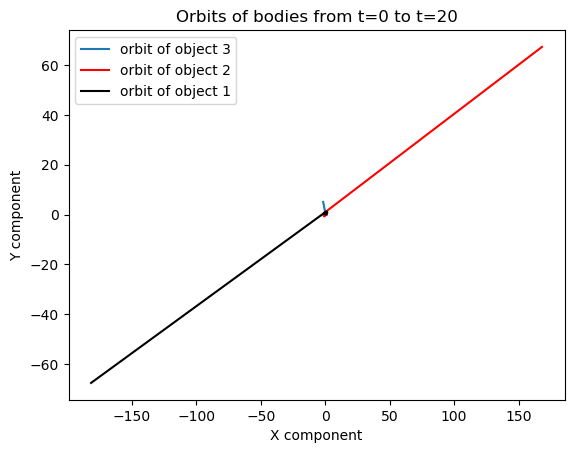

In [92]:
using PyPlot
plot(x3, y3, "-", label="orbit of object 3");
plot(x2, y2, "r-", label="orbit of object 2");
plot(x1, y1, "k-", label="orbit of object 1");
ylabel("Y component");
xlabel("X component");
title("Orbits of bodies from t=0 to t=20");
legend();


I didn't get a nice choreographed orbit when trying to do t=0 to t=20. I checked my code a lot but I didn't find any mistakes or bugs. The objects seem to fly off into distance, perhaps because their velocities are already large and the inverse square of their distance too small. However, when I did run it from t=0 to t=2, I got this nice pattern: 

Looks much nicer! Next, I tried to to vary the initial conditions and check from t=0 to t=2 using the suggested 25% perturbations: 

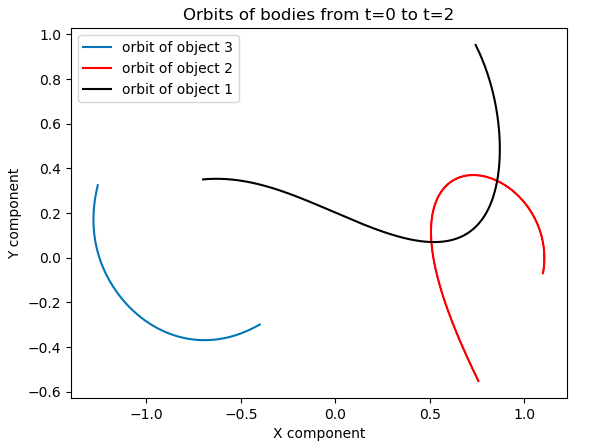

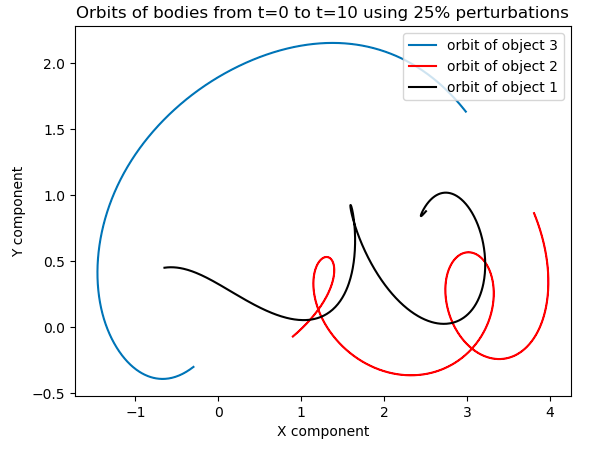

In fact, here all the way until t=10 the orbits are wonky. The black object starts flying off by the time we get to t=11. Now I'll try another perturbation:

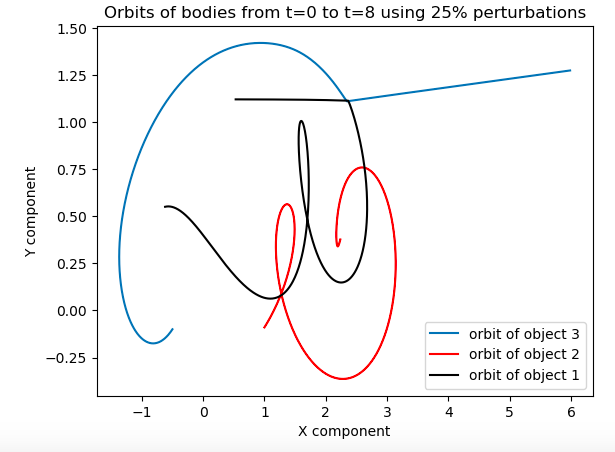

In [ ]:
t0 = 0.0;
h = 0.002;
N = 1000;
ts = collect(t0 .+ h.*(0:N));
x10 = -0.7;
y10 = 0.35;
x20 = 1.1;
y20 = -0.07;
x30 = -0.4;
y30 = -0.3;
vx10 = 0.99;
vy10 = 0.078;
vx20 = 0.1;
vy20 = 0.47;
vx30 = -1.1;
vy30 = -0.53;

#t0 = 0.0;
#h = 0.01;
#N = 1000;
#ts = collect(t0 .+ h.*(0:N));
#x10 = -0.65;
#y10 = 0.45;
#x20 = 0.9;
#y20 = -0.07;
#x30 = -0.3;
#y30 = -0.3;
#vx10 = 0.89;
#vy10 = 0.088;
#vx20 = 0.89;
#vy20 = 0.47;
#vx30 = -1.1;
#vy30 = -0.53;

#t0 = 0.0;
#h = 0.0075;
#N = 1000;
#ts = collect(t0 .+ h.*(0:N));
#x10 = -0.62;
#y10 = 0.55;
#x20 = 1.0;
#y20 = -0.09;
#x30 = -0.5;
#y30 = -0.1;
#vx10 = 0.92;
#vy10 = 0.078;
#vx20 = 0.81;
#vy20 = 0.42;
#vx30 = -1.11;
#vy30 = -0.55;

x1 = zeros(2*size(ts)[1]-1);
vx1 = zeros(2*size(ts)[1]-1);
x1[1] = x10;
vx1[1] = vx10; 

y1 = zeros(2*size(ts)[1]-1);
vy1 = zeros(2*size(ts)[1]-1);
y1[1] = y10;
vy1[1] = vy10; 

x2 = zeros(2*size(ts)[1]-1);
vx2 = zeros(2*size(ts)[1]-1);
x2[1] = x20;
vx2[1] = vx20; 

y2 = zeros(2*size(ts)[1]-1);
vy2 = zeros(2*size(ts)[1]-1);
y2[1] = y20;
vy2[1] = vy20; 

x3 = zeros(2*size(ts)[1]-1);
vx3 = zeros(2*size(ts)[1]-1);
x3[1] = x30;
vx3[1] = vx30; 

y3 = zeros(2*size(ts)[1]-1);
vy3 = zeros(2*size(ts)[1]-1);
y3[1] = y30;
vy3[1] = vy30;

for i in 1:2:size(x1)[1]-2

r12 = (x2[i]-x1[i])^2 + (y2[i]-y1[i])^2
r23 = (x2[i]-x3[i])^2 + (y2[i]-y3[i])^2
r13 = (x3[i]-x1[i])^2 + (y3[i]-y1[i])^2
    
#These are all the 1st velocity steps  
#Velocities for the 1st particle 
vx1[i+1] = vx1[i] + (0.5)*h*((r12^(-1.5))*(x2[i]-x1[i]) + (r13^(-1.5))*(x3[i]-x1[i]))

vy1[i+1] = vy1[i] + (0.5)*h*((r12^(-1.5))*(y2[i]-y1[i]) + (r13^(-1.5))*(y3[i]-y1[i]))

#Velocities for the 2nd particle 

vx2[i+1] = vx2[i] + (0.5)*h*((r12^(-1.5))*(x1[i]-x2[i]) + (r23^(-1.5))*(x3[i]-x2[i]))

vy2[i+1] = vy2[i] + (0.5)*h*((r12^(-1.5))*(y1[i]-y2[i]) + (r23^(-1.5))*(y3[i]-y2[i]))

#Velocities for the 3rd particle 
    
vx3[i+1] = vx3[i] + (0.5)*h*((r13^(-1.5))*(x1[i]-x3[i]) + (r23^(-1.5))*(x2[i]-x3[i]))

vy3[i+1] = vy3[i] + (0.5)*h*((r13^(-1.5))*(y1[i]-y3[i]) + (r23^(-1.5))*(y2[i]-y3[i]))
    
#These are all the position steps
#Positions for the 1st particle        
x1[i+2] = x1[i] + h*vx1[i+1]
y1[i+2] = y1[i] + h*vy1[i+1]

#Positions for the 2nd particle 

x2[i+2] = x2[i] + h*vx2[i+1]    
y2[i+2] = y2[i] + h*vy2[i+1]
    
#Positions for the 3rd particle
    
x3[i+2] = x3[i] + h*vx3[i+1]    
y3[i+2] = y3[i] + h*vy3[i+1]
    
#These are all the 2nd velocity steps 
r12 = (x2[i+2]-x1[i+2])^2 + (y2[i+2]-y1[i+2])^2
r23 = (x2[i+2]-x3[i+2])^2 + (y2[i+2]-y3[i+2])^2
r13 = (x3[i+2]-x1[i+2])^2 + (y3[i+2]-y1[i+2])^2
#Velocity for particle 1
       
vx1[i+2] = vx1[i+1]+ (0.5)*h*((r12^(-1.5))*(x2[i+2]-x1[i+2]) + (r23^(-1.5))*(x3[i+2]-x1[i+2]))
    
vy1[i+2] = vy1[i+1]+ (0.5)*h*((r12^(-1.5))*(y2[i+2]-y1[i+2]) + (r23^(-1.5))*(y3[i+2]-y1[i+2]))
    
#Velocity for particle 2 

vx2[i+2] = vx2[i+1]+ (0.5)*h*((r12^(-1.5))*(x1[i+2]-x2[i+2]) + (r23^(-1.5))*(x3[i+2]-x2[i+2]))

vy2[i+2] = vy2[i+1]+ (0.5)*h*((r12^(-1.5))*(y1[i+2]-y2[i+2]) + (r23^(-1.5))*(y3[i+2]-y2[i+2]))

#Velocity for particle 3

vx3[i+2] = vx3[i+1]+ (0.5)*h*((r13^(-1.5))*(x1[i+2]-x3[i+2]) + (r23^(-1.5))*(x2[i+2]-x3[i+2]))

vy3[i+2] = vy3[i+1]+ (0.5)*h*((r13^(-1.5))*(y1[i+2]-y3[i+2]) + (r23^(-1.5))*(y2[i+2]-y3[i+2]))

end

x1 = deleteat!(x1, 2:2:size(x1)[1]-1);
vx1 = deleteat!(vx1, 2:2:size(vx1)[1]-1);

y1 = deleteat!(y1, 2:2:size(y1)[1]-1);
vy1 = deleteat!(vy1, 2:2:size(vy1)[1]-1);


x2 = deleteat!(x2, 2:2:size(x2)[1]-1);
vx2 = deleteat!(vx2, 2:2:size(vx2)[1]-1);

y2 = deleteat!(y2, 2:2:size(y2)[1]-1);
vy2 = deleteat!(vy2, 2:2:size(vy2)[1]-1);


x3 = deleteat!(x3, 2:2:size(x3)[1]-1);
vx3 = deleteat!(vx3, 2:2:size(vx3)[1]-1);

y3 = deleteat!(y3, 2:2:size(y3)[1]-1);
vy3 = deleteat!(vy3, 2:2:size(vy3)[1]-1);

using PyPlot
plot(x3, y3, "-", label="orbit of object 3");
plot(x2, y2, "r-", label="orbit of object 2");
plot(x1, y1, "k-", label="orbit of object 1");
ylabel("Y component");
xlabel("X component");
title("Orbits of bodies from t=0 to t=2");
legend();